In [117]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [119]:
path="/content/drive/MyDrive/data sets/titanic.csv"
df=pd.read_csv(path)

In [120]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [121]:
df.shape

(850, 15)

In [122]:
# 850 enteries and 15 columns

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [124]:
#filling null values
age_mean=df['age'].mean()

In [125]:
df['age']=df['age'].fillna(age_mean)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [127]:
fare_mean=df['fare'].mean()

In [128]:
df['fare']=df['fare'].fillna(fare_mean)

In [129]:
#since their are lot of null values of cabin we can either drop it or replace by mod
df.drop(columns='cabin',inplace=True)

In [130]:
df['embarked'].value_counts()

S    589
C    176
Q     84
Name: embarked, dtype: int64

In [131]:
df['embarked']=df['embarked'].fillna('S')

In [132]:
# similarly boat body and home dest. have too much null values to work with so we will drop them too
df.drop(columns='boat',inplace=True)

In [133]:
df.drop(columns='body',inplace=True)

In [134]:
df.drop(columns='home.dest',inplace=True)

In [135]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,29.519847,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.000000,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.000000,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.000000,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.000000,0,0,28221,13.0000,S,0


In [136]:
df.shape

(850, 11)

In [137]:
#only 11 columns now
# factors like passenge_id,name,ticket also dont have a role in predicting survibility rate so we create a new dataframe without them
df1=df[['pclass','sex','age','sibsp','parch','fare','embarked','survived']]

In [138]:
df1.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,female,29.519847,0,0,7.7333,Q,1
1,3,male,38.000000,0,0,8.6625,S,0
2,3,female,30.000000,1,1,24.1500,S,0
3,2,female,54.000000,1,3,23.0000,S,1
4,2,male,40.000000,0,0,13.0000,S,0


In [139]:
#analysing df1

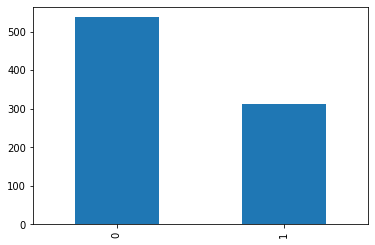

In [140]:
# survivability count
df1['survived'].value_counts().plot(kind='bar')

In [141]:
df1['survived'].value_counts()

0    537
1    313
Name: survived, dtype: int64

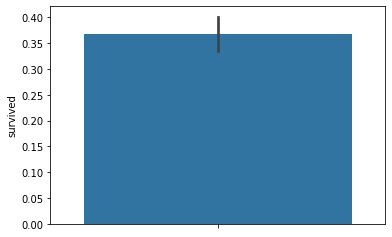

In [142]:
sns.barplot(y=df1['survived'])

In [143]:
# Survivability rate of titanic was a little over 0.35 i.e out of 100 people only around 37 survived

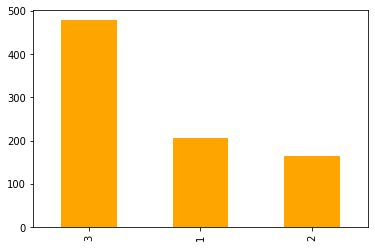

In [234]:
df1['pclass'].value_counts().plot(kind='bar',color='orange')

In [145]:
# so there were 3 classes with max people in class 3 and min in class 2

COMPARING CLASS TO SURVIBED

[Text(0.5, 0, 'Passenger Class')]

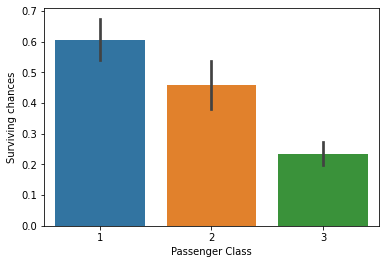

In [146]:
y=sns.barplot(x=df1['pclass'],y=df1['survived'])
y.set(ylabel='Surviving chances')
y.set(xlabel='Passenger Class')

In [147]:
#we can clearly see that different classes had different survibility rate

GENDER VS SURVIVABILITY

In [148]:
df1['sex'].value_counts()

male      551
female    299
Name: sex, dtype: int64

In [149]:
# either males or females in ship no other gender

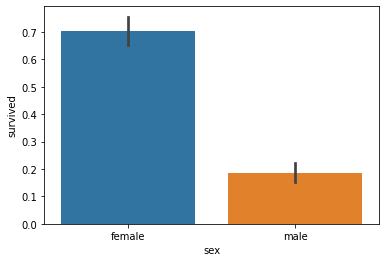

In [150]:
sns.barplot(x=df1['sex'],y=df['survived'])

In [151]:
# females have much much higher chances of survival then men

Age vs Survivability

In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    850 non-null    int64  
 1   sex       850 non-null    object 
 2   age       850 non-null    float64
 3   sibsp     850 non-null    int64  
 4   parch     850 non-null    int64  
 5   fare      850 non-null    float64
 6   embarked  850 non-null    object 
 7   survived  850 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 53.2+ KB


In [153]:
df1['age']=df1['age'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    850 non-null    int64  
 1   sex       850 non-null    object 
 2   age       850 non-null    int64  
 3   sibsp     850 non-null    int64  
 4   parch     850 non-null    int64  
 5   fare      850 non-null    float64
 6   embarked  850 non-null    object 
 7   survived  850 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 53.2+ KB


In [155]:
df1.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,female,29,0,0,7.7333,Q,1
1,3,male,38,0,0,8.6625,S,0
2,3,female,30,1,1,24.1500,S,0
3,2,female,54,1,3,23.0000,S,1
4,2,male,40,0,0,13.0000,S,0


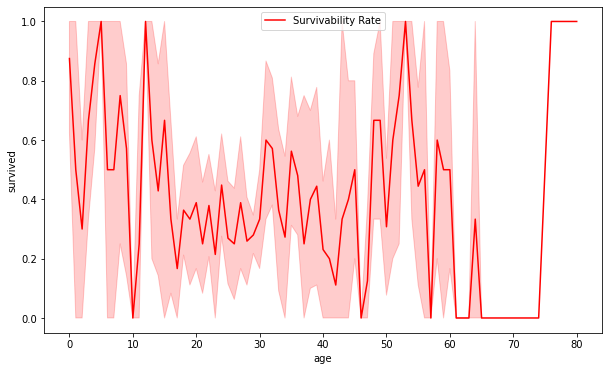

In [156]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df1['age'],y=df1['survived'],color='red',label='Survivability Rate')

In [157]:
# it can be clearly senn that person having age less than 20 and more than 45 have higher chances of survibility the the person in range between them 
# but again person having age arond 60 have low chances of survival

In [158]:
y=df1['age'].unique()

In [159]:
y

array([29, 38, 30, 54, 40, 28, 19, 22, 21, 27, 60, 56, 20, 16, 48, 32, 24,
       25, 18, 35, 42, 13, 45, 34, 57,  2, 58, 46, 50, 14, 23,  6, 37,  1,
       36, 39, 33, 26, 41, 47, 31,  8, 17, 49, 11, 55, 51,  0, 65, 64, 15,
       80, 43,  3, 61,  9, 10, 44, 52,  7, 70,  5, 62, 53,  4, 67, 63, 12,
       74, 59, 76])

In [160]:
len(y)

71

In [161]:
y.sort()

In [162]:
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70,
       74, 76, 80])

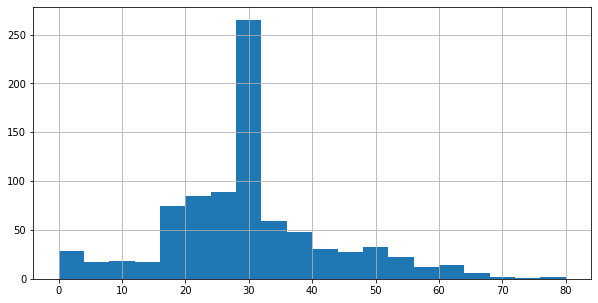

In [163]:
plt.figure(figsize=(10,5))
df1['age'].hist(bins=20)

In [164]:
# most person have their ages in range 20-40

In [165]:
df1['age'].max()

80

In [166]:
#oldest person in titanic was 80 years

In [167]:
df80=df1[df1['age']==80]

In [168]:
df80

,pclass,sex,age,sibsp,parch,fare,embarked,survived
177,1,male,80,0,0,30.0,S,1


In [169]:
#only one person was of 80 years and he survived

## sibsp

In [170]:
df['sibsp'].value_counts() # no. of relatives people are travelling with

0    573
1    213
2     25
4     14
3     12
8      8
5      5
Name: sibsp, dtype: int64

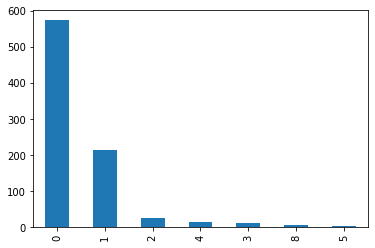

In [171]:
df['sibsp'].value_counts().plot(kind='bar')

In [172]:
#most of the people were travelling alone(more than 500)

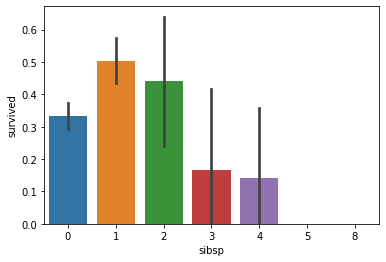

In [173]:
sns.barplot(x=df1['sibsp'],y=df1['survived'])

In [174]:
#relationship is random but we can see that people travelling with one relative have higher chances of survival then others

In [175]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    850 non-null    int64  
 1   sex       850 non-null    object 
 2   age       850 non-null    int64  
 3   sibsp     850 non-null    int64  
 4   parch     850 non-null    int64  
 5   fare      850 non-null    float64
 6   embarked  850 non-null    object 
 7   survived  850 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 53.2+ KB


In [176]:
df1.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,female,29,0,0,7.7333,Q,1
1,3,male,38,0,0,8.6625,S,0
2,3,female,30,1,1,24.1500,S,0
3,2,female,54,1,3,23.0000,S,1
4,2,male,40,0,0,13.0000,S,0


Survivability vs parch(nanny)

In [177]:
df1['parch'].value_counts()

0    651
1    113
2     72
4      5
3      3
5      3
9      2
6      1
Name: parch, dtype: int64

In [178]:
#will likely have low correlation to survivability

In [179]:
df1.corr()['survived']

pclass     -0.329360
age        -0.036822
sibsp      -0.044980
parch       0.059172
fare        0.251162
survived    1.000000
Name: survived, dtype: float64

In [180]:
#low correlation to parch

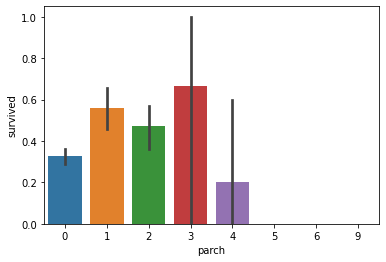

In [181]:
sns.barplot(x=df1['parch'],y=df1['survived'])

In [182]:
dfparch=df1[df1['parch']>=4]

In [183]:
dfparch

,pclass,sex,age,sibsp,parch,fare,embarked,survived
47,3,male,29,1,9,69.5500,S,0
63,3,female,29,0,4,25.4667,S,0
133,3,female,29,1,9,69.5500,S,0
199,3,male,40,1,6,46.9000,S,0
247,1,male,64,1,4,263.0000,S,0
281,3,female,29,0,4,21.0750,S,0
318,3,female,39,1,5,31.2750,S,0
479,3,female,39,0,5,29.1250,Q,0
679,3,male,39,1,5,31.2750,S,0
714,1,female,60,1,4,263.0000,S,1


In [184]:
dfparch['survived'].value_counts()

0    10
1     1
Name: survived, dtype: int64

In [185]:
#rate of surcival is very low if a person have high numbers of caretakers

In [186]:
df1.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,female,29,0,0,7.7333,Q,1
1,3,male,38,0,0,8.6625,S,0
2,3,female,30,1,1,24.1500,S,0
3,2,female,54,1,3,23.0000,S,1
4,2,male,40,0,0,13.0000,S,0


Fare Vs Survivability

In [187]:
# these have high correlation

In [188]:
f=df1['fare'].unique()

In [189]:
len(f)

237

In [190]:
# 237 different values of fare was collected from passangers

In [191]:
min(f)

0.0

In [192]:
max(f)

512.3292

In [193]:
#ranging from 0-512.3298

In [194]:
f

array([  7.7333    ,   8.6625    ,  24.15      ,  23.        ,
        13.        ,  22.525     ,   0.        ,   7.775     ,
         9.825     , 211.5       ,  76.2917    ,  83.1583    ,
        20.25      ,   7.8542    ,  16.        ,  23.25      ,
        55.        ,   8.4583    ,  65.        ,   7.8958    ,
         8.05      ,  26.        ,   7.75      ,  21.        ,
         7.2292    ,  52.        ,  25.925     ,   8.1583    ,
        11.5       ,   7.925     , 262.375     ,   7.55      ,
         7.25      ,  15.1       , 134.5       ,  30.5       ,
        83.475     ,  15.5792    ,  69.55      , 153.4625    ,
         7.125     ,  79.2       ,  10.5       , 120.        ,
       512.3292    ,  25.4667    ,  20.575     ,   9.4833    ,
        60.        ,  20.525     ,   9.2167    ,  14.1083    ,
       106.425     ,  26.55      ,  14.4542    ,   7.4958    ,
        10.1708    ,   7.05      , 110.8833    ,  21.6792    ,
        32.5       ,  14.4583    ,  80.        ,   9.5 

In [195]:
#almost all of the fare lies in 0-100 range

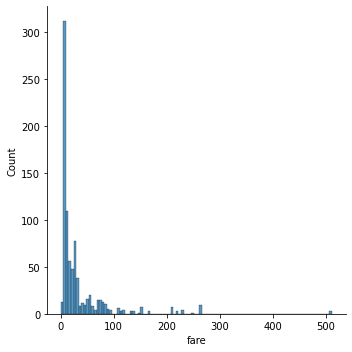

In [196]:
sns.displot(x=df1['fare'])

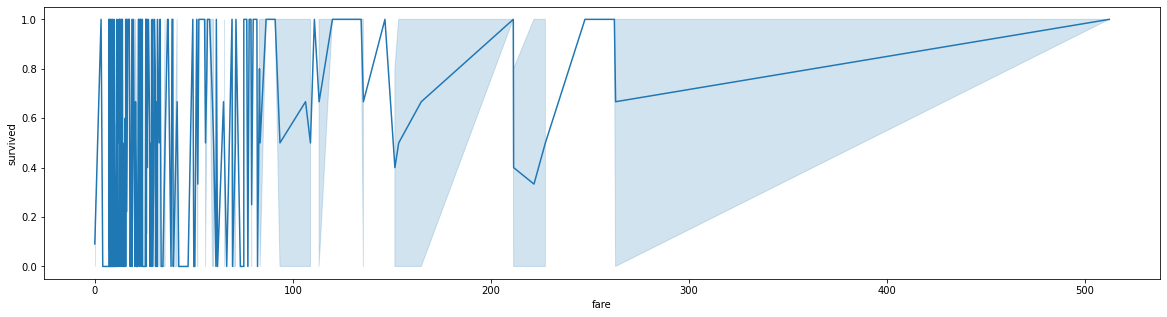

In [197]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df1['fare'],y=df1['survived'])

In [198]:
# upto 100 fare the graph is pretty scattered but it can be seen that after 100 fare the chances of survival is very high

In [199]:
# due to so much inaccuracy in data we will drop this column as well

In [200]:
df1.drop(columns='fare',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [201]:
df1.head()

,pclass,sex,age,sibsp,parch,embarked,survived
0,3,female,29,0,0,Q,1
1,3,male,38,0,0,S,0
2,3,female,30,1,1,S,0
3,2,female,54,1,3,S,1
4,2,male,40,0,0,S,0


Embarked vs Survivability

In [202]:
df1['embarked'].value_counts()

S    590
C    176
Q     84
Name: embarked, dtype: int64

In [203]:
# 3 destinations

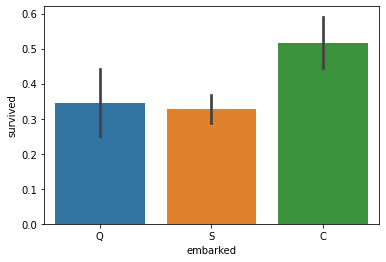

In [204]:
sns.barplot(x=df1['embarked'],y=df1['survived'])

In [205]:
# passengers boarding from c have higest chances of living

## CONVERTING MY WHOLE DATA IN NUMERIC FORM 

In [206]:
df1['sex'].unique()

array(['female', 'male'], dtype=object)

In [207]:
def gender(text):
  if text == 'female':
    return 0
  else:
    return 1

In [208]:
df1['sex']=df1['sex'].apply(gender)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
df1['embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [210]:
def embarked(text):
  if text=='Q':
    return 1
  if text =='S':
    return 2
  else:
    return 3

In [211]:
df1['embarked']=df1['embarked'].apply(embarked)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [212]:
df1.head()

,pclass,sex,age,sibsp,parch,embarked,survived
0,3,0,29,0,0,1,1
1,3,1,38,0,0,2,0
2,3,0,30,1,1,2,0
3,2,0,54,1,3,2,1
4,2,1,40,0,0,2,0


MALE--1       
FEMALE--0             

##Q--1

##S--2

## C--3

In [213]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pclass    850 non-null    int64
 1   sex       850 non-null    int64
 2   age       850 non-null    int64
 3   sibsp     850 non-null    int64
 4   parch     850 non-null    int64
 5   embarked  850 non-null    int64
 6   survived  850 non-null    int64
dtypes: int64(7)
memory usage: 46.6 KB


In [214]:
df1.corr()

,pclass,sex,age,sibsp,parch,embarked,survived
pclass,1.000000,0.151932,-0.369809,0.074418,-0.006388,-0.335034,-0.329360
sex,0.151932,1.000000,0.029312,-0.123723,-0.170068,-0.002896,-0.510274
age,-0.369809,0.029312,1.000000,-0.188152,-0.129297,0.060203,-0.036822
sibsp,0.074418,-0.123723,-0.188152,1.000000,0.389236,-0.021577,-0.044980
parch,-0.006388,-0.170068,-0.129297,0.389236,1.000000,0.029177,0.059172
embarked,-0.335034,-0.002896,0.060203,-0.021577,0.029177,1.000000,0.126472
survived,-0.329360,-0.510274,-0.036822,-0.044980,0.059172,0.126472,1.000000


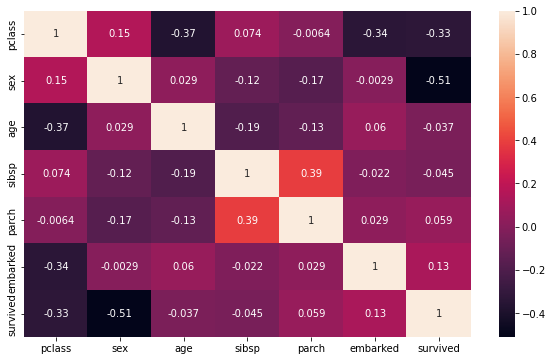

In [215]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)

### APPLYING ML MODEL

In [216]:
x=df1.drop(columns='survived')

In [217]:
y=df1['survived']

In [218]:
x

,pclass,sex,age,sibsp,parch,embarked
0,3,0,29,0,0,1
1,3,1,38,0,0,2
2,3,0,30,1,1,2
3,2,0,54,1,3,2
4,2,1,40,0,0,2
...,...,...,...,...,...,...
845,1,1,55,0,0,2
846,1,1,58,0,0,3
847,2,0,24,1,0,2
848,3,0,3,1,1,2


In [219]:
y

0      1
1      0
2      0
3      1
4      0
      ..
845    0
846    0
847    1
848    0
849    0
Name: survived, Length: 850, dtype: int64

In [220]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [221]:
from sklearn.metrics import accuracy_score

In [222]:
from sklearn.linear_model import LogisticRegression

In [223]:
logistic=LogisticRegression()

In [224]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [225]:
y_pred=logistic.predict(x_test)

## ACCURACY SCORE OF LOGISTIC REGRESSION

In [226]:
accuracy_score(y_test,y_pred)

0.75

In [227]:
len(y_test)

128

In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [229]:
knc=KNeighborsClassifier(n_neighbors=7)

In [230]:
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [231]:
y2_pred=knc.predict(x_test)

## ACCURACY SCORE OF KNN

In [232]:
accuracy_score(y_test,y2_pred)

0.8203125